In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random

In [ ]:
data=pd.read_csv('/content/python machine learning model xgboost - electricity demand dataset.csv')

In [ ]:
data

,Timestamp,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
0,01-Jan-20,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
1,01-Jan-20,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2,01-Jan-20,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
3,01-Jan-20,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
4,01-Jan-20,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...
43843,31-Dec-24,19.0,1.0,12.0,2024.0,366.0,3.956838,43.287161,4689.693109
43844,31-Dec-24,20.0,1.0,12.0,2024.0,366.0,3.118824,51.705756,4331.249224
43845,31-Dec-24,21.0,1.0,12.0,2024.0,366.0,3.000000,40.565916,4015.979957
43846,31-Dec-24,22.0,1.0,12.0,2024.0,366.0,3.000000,51.998107,3353.241682


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    43848 non-null  object 
 1   hour         43837 non-null  float64
 2   dayofweek    43839 non-null  float64
 3   month        43840 non-null  float64
 4   year         43843 non-null  float64
 5   dayofyear    43843 non-null  float64
 6   Temperature  43841 non-null  float64
 7   Humidity     43838 non-null  float64
 8   Demand       43841 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.0+ MB


In [ ]:
data=data.set_index('Timestamp')

In [ ]:
data

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
01-Jan-20,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
01-Jan-20,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
01-Jan-20,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
01-Jan-20,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
01-Jan-20,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...
31-Dec-24,19.0,1.0,12.0,2024.0,366.0,3.956838,43.287161,4689.693109
31-Dec-24,20.0,1.0,12.0,2024.0,366.0,3.118824,51.705756,4331.249224
31-Dec-24,21.0,1.0,12.0,2024.0,366.0,3.000000,40.565916,4015.979957


In [ ]:
data[['Temperature','Humidity','Demand']].describe()

,Temperature,Humidity,Demand
count,43841.000000,43838.000000,43841.000000
mean,25.067788,59.903007,5000.790976
std,12.821725,18.342604,1412.527409
min,3.000000,20.000000,1611.954020
25%,15.210186,46.241224,4015.668472
50%,25.003212,59.986720,5013.053367
75%,34.740971,73.796820,6000.803082
max,50.000000,95.000000,11910.705100


In [ ]:
data[data.isna().any(axis=1)]

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
30-Apr-20,NaN,3.0,4.0,2020.0,121.0,21.820261,41.353675,5393.127681
21-Jul-20,NaN,1.0,7.0,2020.0,203.0,36.555833,62.779665,6248.349423
20-Feb-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20-Feb-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20-Feb-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20-Feb-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27-Feb-21,NaN,5.0,2.0,2021.0,58.0,24.001003,53.303268,4523.253789
13-Dec-21,23.0,0.0,12.0,2021.0,NaN,3.000000,75.457130,3225.225822
14-Dec-21,NaN,1.0,12.0,2021.0,348.0,5.061319,47.215825,2887.848612


In [ ]:
data[data.isna().all(axis=1)]

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
20-Feb-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20-Feb-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20-Feb-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20-Feb-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data=data.dropna(how='all')
data

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
01-Jan-20,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
01-Jan-20,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
01-Jan-20,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
01-Jan-20,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
01-Jan-20,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...
31-Dec-24,19.0,1.0,12.0,2024.0,366.0,3.956838,43.287161,4689.693109
31-Dec-24,20.0,1.0,12.0,2024.0,366.0,3.118824,51.705756,4331.249224
31-Dec-24,21.0,1.0,12.0,2024.0,366.0,3.000000,40.565916,4015.979957


In [ ]:
data.isnull().sum()

,0
hour,7
dayofweek,5
month,4
year,1
dayofyear,1
Temperature,3
Humidity,6
Demand,3


In [ ]:
data[['hour','dayofweek','month','year','dayofyear']]=data[['hour','dayofweek','month','year','dayofyear']].ffill()

/tmp/ipython-input-1955423327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['hour','dayofweek','month','year','dayofyear']]=data[['hour','dayofweek','month','year','dayofyear']].ffill()


In [ ]:
data[['Temperature','Humidity']]=data[['Temperature','Humidity']].bfill()

/tmp/ipython-input-3491569864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Temperature','Humidity']]=data[['Temperature','Humidity']].bfill()


In [ ]:
# Convert your index into datetime
data.index = pd.to_datetime(data.index)

# Now you can safely interpolate with time
data['Demand'] = data['Demand'].interpolate(method='time')


/tmp/ipython-input-3408888718.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data.index = pd.to_datetime(data.index)
/tmp/ipython-input-3408888718.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Demand'] = data['Demand'].interpolate(method='time')


In [ ]:
data['Demand'] = data['Demand'].interpolate(method = 'time')

/tmp/ipython-input-3592496682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Demand'] = data['Demand'].interpolate(method = 'time')


In [ ]:
data.isnull().sum()

,0
hour,0
dayofweek,0
month,0
year,0
dayofyear,0
Temperature,0
Humidity,0
Demand,0


In [ ]:
data.shape

(43844, 8)

In [ ]:

data

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
2020-01-01,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2020-01-01,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
2020-01-01,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
2020-01-01,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,366.0,3.956838,43.287161,4689.693109
2024-12-31,20.0,1.0,12.0,2024.0,366.0,3.118824,51.705756,4331.249224
2024-12-31,21.0,1.0,12.0,2024.0,366.0,3.000000,40.565916,4015.979957


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43844 entries, 2020-01-01 to 2024-12-31
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour         43844 non-null  float64
 1   dayofweek    43844 non-null  float64
 2   month        43844 non-null  float64
 3   year         43844 non-null  float64
 4   dayofyear    43844 non-null  float64
 5   Temperature  43844 non-null  float64
 6   Humidity     43844 non-null  float64
 7   Demand       43844 non-null  float64
dtypes: float64(8)
memory usage: 3.0 MB


In [ ]:
if 'quarter' not in data.columns:
    data.insert(5, 'quarter', data.index.quarter)
data

,hour,dayofweek,month,year,dayofyear,quarter,Temperature,Humidity,Demand
Timestamp,,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,1,3.000000,61.288951,2457.119872
2020-01-01,1.0,2.0,1.0,2020.0,1.0,1,3.000000,52.873702,2269.904712
2020-01-01,2.0,2.0,1.0,2020.0,1.0,1,4.244482,36.341783,2215.640403
2020-01-01,3.0,2.0,1.0,2020.0,1.0,1,3.000000,72.629378,2174.232413
2020-01-01,4.0,2.0,1.0,2020.0,1.0,1,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,366.0,4,3.956838,43.287161,4689.693109
2024-12-31,20.0,1.0,12.0,2024.0,366.0,4,3.118824,51.705756,4331.249224
2024-12-31,21.0,1.0,12.0,2024.0,366.0,4,3.000000,40.565916,4015.979957


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43844 entries, 2020-01-01 to 2024-12-31
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour         43844 non-null  float64
 1   dayofweek    43844 non-null  float64
 2   month        43844 non-null  float64
 3   year         43844 non-null  float64
 4   dayofyear    43844 non-null  float64
 5   quarter      43844 non-null  int32  
 6   Temperature  43844 non-null  float64
 7   Humidity     43844 non-null  float64
 8   Demand       43844 non-null  float64
dtypes: float64(8), int32(1)
memory usage: 3.2 MB


In [ ]:
data[['hour', 'dayofweek', 'month','year', 'dayofyear']] = data[['hour', 'dayofweek', 'month','year', 'dayofyear']].astype(int)

/tmp/ipython-input-2278624335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['hour', 'dayofweek', 'month','year', 'dayofyear']] = data[['hour', 'dayofweek', 'month','year', 'dayofyear']].astype(int)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43844 entries, 2020-01-01 to 2024-12-31
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour         43844 non-null  int64  
 1   dayofweek    43844 non-null  int64  
 2   month        43844 non-null  int64  
 3   year         43844 non-null  int64  
 4   dayofyear    43844 non-null  int64  
 5   quarter      43844 non-null  int32  
 6   Temperature  43844 non-null  float64
 7   Humidity     43844 non-null  float64
 8   Demand       43844 non-null  float64
dtypes: float64(3), int32(1), int64(5)
memory usage: 3.2 MB


In [ ]:
data

,hour,dayofweek,month,year,dayofyear,quarter,Temperature,Humidity,Demand
Timestamp,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,3.000000,61.288951,2457.119872
2020-01-01,1,2,1,2020,1,1,3.000000,52.873702,2269.904712
2020-01-01,2,2,1,2020,1,1,4.244482,36.341783,2215.640403
2020-01-01,3,2,1,2020,1,1,3.000000,72.629378,2174.232413
2020-01-01,4,2,1,2020,1,1,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,4,3.956838,43.287161,4689.693109
2024-12-31,20,1,12,2024,366,4,3.118824,51.705756,4331.249224
2024-12-31,21,1,12,2024,366,4,3.000000,40.565916,4015.979957


In [ ]:
data.tail(50)

,hour,dayofweek,month,year,dayofyear,quarter,Temperature,Humidity,Demand
Timestamp,,,,,,,,,
2024-12-29,22,6,12,2024,364,4,3.000000,70.021729,2929.747277
2024-12-29,23,6,12,2024,364,4,3.000000,52.836009,2668.369837
2024-12-30,0,0,12,2024,365,4,3.000000,65.892957,2699.075526
2024-12-30,1,0,12,2024,365,4,3.000000,72.128006,2644.045970
2024-12-30,2,0,12,2024,365,4,3.000000,68.631804,2206.527443
2024-12-30,3,0,12,2024,365,4,5.018972,78.981498,2414.881030
2024-12-30,4,0,12,2024,365,4,3.000000,70.592472,2473.705275
2024-12-30,5,0,12,2024,365,4,7.835546,74.624102,3291.585334
2024-12-30,6,0,12,2024,365,4,11.118482,68.974585,4120.280932


In [ ]:
data.insert(7, 'is_weekend', data.index.dayofweek.isin([5,6]))
data

,hour,dayofweek,month,year,dayofyear,quarter,Temperature,is_weekend,Humidity,Demand
Timestamp,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,3.000000,False,61.288951,2457.119872
2020-01-01,1,2,1,2020,1,1,3.000000,False,52.873702,2269.904712
2020-01-01,2,2,1,2020,1,1,4.244482,False,36.341783,2215.640403
2020-01-01,3,2,1,2020,1,1,3.000000,False,72.629378,2174.232413
2020-01-01,4,2,1,2020,1,1,3.881208,False,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,4,3.956838,False,43.287161,4689.693109
2024-12-31,20,1,12,2024,366,4,3.118824,False,51.705756,4331.249224
2024-12-31,21,1,12,2024,366,4,3.000000,False,40.565916,4015.979957


In [ ]:
data['is_weekend'] = data['is_weekend'].astype(int)
data

/tmp/ipython-input-3258938516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_weekend'] = data['is_weekend'].astype(int)


,hour,dayofweek,month,year,dayofyear,quarter,Temperature,is_weekend,Humidity,Demand
Timestamp,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,3.000000,0,61.288951,2457.119872
2020-01-01,1,2,1,2020,1,1,3.000000,0,52.873702,2269.904712
2020-01-01,2,2,1,2020,1,1,4.244482,0,36.341783,2215.640403
2020-01-01,3,2,1,2020,1,1,3.000000,0,72.629378,2174.232413
2020-01-01,4,2,1,2020,1,1,3.881208,0,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,4,3.956838,0,43.287161,4689.693109
2024-12-31,20,1,12,2024,366,4,3.118824,0,51.705756,4331.249224
2024-12-31,21,1,12,2024,366,4,3.000000,0,40.565916,4015.979957


In [ ]:
data[data['is_weekend'] == 1]

,hour,dayofweek,month,year,dayofyear,quarter,Temperature,is_weekend,Humidity,Demand
Timestamp,,,,,,,,,,
2020-01-04,0,5,1,2020,4,1,3.000000,1,60.955363,2067.352696
2020-01-04,1,5,1,2020,4,1,3.000000,1,66.494073,2138.504702
2020-01-04,2,5,1,2020,4,1,3.000000,1,56.398199,1880.418696
2020-01-04,3,5,1,2020,4,1,4.474526,1,60.603500,2005.823854
2020-01-04,4,5,1,2020,4,1,7.738184,1,65.808825,2203.720413
...,...,...,...,...,...,...,...,...,...,...
2024-12-29,19,6,12,2024,364,4,7.077721,1,46.341323,4304.049396
2024-12-29,20,6,12,2024,364,4,3.000000,1,69.641621,4146.583958
2024-12-29,21,6,12,2024,364,4,3.723222,1,46.751731,3366.641206


In [ ]:
import holidays

In [ ]:
data['Holidays'] = holidays.IN(years = data.year)

/tmp/ipython-input-2209141230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Holidays'] = holidays.IN(years = data.year)


In [ ]:
data

,hour,dayofweek,month,year,dayofyear,quarter,Temperature,is_weekend,Humidity,Demand,Holidays
Timestamp,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,3.000000,0,61.288951,2457.119872,NaN
2020-01-01,1,2,1,2020,1,1,3.000000,0,52.873702,2269.904712,NaN
2020-01-01,2,2,1,2020,1,1,4.244482,0,36.341783,2215.640403,NaN
2020-01-01,3,2,1,2020,1,1,3.000000,0,72.629378,2174.232413,NaN
2020-01-01,4,2,1,2020,1,1,3.881208,0,90.582444,2472.453006,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,4,3.956838,0,43.287161,4689.693109,NaN
2024-12-31,20,1,12,2024,366,4,3.118824,0,51.705756,4331.249224,NaN
2024-12-31,21,1,12,2024,366,4,3.000000,0,40.565916,4015.979957,NaN


In [ ]:
data.Holidays.value_counts()

,count
Holidays,
Republic Day,120
Maha Shivaratri,120
Mahavir Jayanti,120
Good Friday,120
Buddha Purnima,120
Eid al-Fitr,120
Eid al-Adha,120
Janmashtami,120
Independence Day,120


In [ ]:
data = data.drop('Holidays', axis=1)

In [ ]:
data['Demand_lag_24hr'] = data['Demand'].shift(24)

In [ ]:
data['demand_lag_168hr'] = data['Demand'].shift(168)

In [ ]:
data.head(50)

,hour,dayofweek,month,year,dayofyear,quarter,Temperature,is_weekend,Humidity,Demand,Demand_lag_24hr,demand_lag_168hr
Timestamp,,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,3.000000,0,61.288951,2457.119872,NaN,NaN
2020-01-01,1,2,1,2020,1,1,3.000000,0,52.873702,2269.904712,NaN,NaN
2020-01-01,2,2,1,2020,1,1,4.244482,0,36.341783,2215.640403,NaN,NaN
2020-01-01,3,2,1,2020,1,1,3.000000,0,72.629378,2174.232413,NaN,NaN
2020-01-01,4,2,1,2020,1,1,3.881208,0,90.582444,2472.453006,NaN,NaN
2020-01-01,5,2,1,2020,1,1,10.822571,0,67.753433,3104.845505,NaN,NaN
2020-01-01,6,2,1,2020,1,1,6.306673,0,94.912591,3759.476912,NaN,NaN
2020-01-01,7,2,1,2020,1,1,7.464640,0,74.456860,4114.486001,NaN,NaN
2020-01-01,8,2,1,2020,1,1,14.746876,0,66.725005,4575.159503,NaN,NaN


In [ ]:
data.iloc[160:200]

,hour,dayofweek,month,year,dayofyear,quarter,Temperature,is_weekend,Humidity,Demand,Demand_lag_24hr,demand_lag_168hr
Timestamp,,,,,,,,,,,,
2020-01-07,16,1,1,2020,7,1,14.016616,0,37.637752,4587.785143,4733.816549,NaN
2020-01-07,17,1,1,2020,7,1,6.736632,0,54.734906,4833.704288,4796.039663,NaN
2020-01-07,18,1,1,2020,7,1,17.782435,0,49.297649,5400.257796,4791.518998,NaN
2020-01-07,19,1,1,2020,7,1,3.000000,0,37.696671,4424.534926,4492.165854,NaN
2020-01-07,20,1,1,2020,7,1,7.116704,0,46.152197,4279.454320,4398.302015,NaN
2020-01-07,21,1,1,2020,7,1,5.158936,0,44.385460,3768.807077,3705.698515,NaN
2020-01-07,22,1,1,2020,7,1,3.000000,0,46.821530,2924.189540,3211.918549,NaN
2020-01-07,23,1,1,2020,7,1,3.000000,0,44.708096,2657.653050,2857.968639,NaN
2020-01-08,0,2,1,2020,8,1,3.000000,0,47.891592,2363.060115,2216.875986,2457.119872


In [ ]:

data['demand_rolling_mean_24hr'] = data['Demand'].rolling(window=24).mean()

In [ ]:
data['demand_rolling_std_24hr'] = data['Demand'].rolling(window=24).std()

In [ ]:
data.head(27)

,hour,dayofweek,month,year,dayofyear,quarter,Temperature,is_weekend,Humidity,Demand,Demand_lag_24hr,demand_lag_168hr,demand_rolling_mean_24hr,demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,3.000000,0,61.288951,2457.119872,NaN,NaN,NaN,NaN
2020-01-01,1,2,1,2020,1,1,3.000000,0,52.873702,2269.904712,NaN,NaN,NaN,NaN
2020-01-01,2,2,1,2020,1,1,4.244482,0,36.341783,2215.640403,NaN,NaN,NaN,NaN
2020-01-01,3,2,1,2020,1,1,3.000000,0,72.629378,2174.232413,NaN,NaN,NaN,NaN
2020-01-01,4,2,1,2020,1,1,3.881208,0,90.582444,2472.453006,NaN,NaN,NaN,NaN
2020-01-01,5,2,1,2020,1,1,10.822571,0,67.753433,3104.845505,NaN,NaN,NaN,NaN
2020-01-01,6,2,1,2020,1,1,6.306673,0,94.912591,3759.476912,NaN,NaN,NaN,NaN
2020-01-01,7,2,1,2020,1,1,7.464640,0,74.456860,4114.486001,NaN,NaN,NaN,NaN
2020-01-01,8,2,1,2020,1,1,14.746876,0,66.725005,4575.159503,NaN,NaN,NaN,NaN


In [ ]:
data = data.dropna()
data

,hour,dayofweek,month,year,dayofyear,quarter,Temperature,is_weekend,Humidity,Demand,Demand_lag_24hr,demand_lag_168hr,demand_rolling_mean_24hr,demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,
2020-01-08,0,2,1,2020,8,1,3.000000,0,47.891592,2363.060115,2216.875986,2457.119872,3857.890516,1007.130968
2020-01-08,1,2,1,2020,8,1,4.433666,0,61.209727,2282.558766,2400.102433,2269.904712,3852.992863,1014.785101
2020-01-08,2,2,1,2020,8,1,5.000529,0,63.868618,2193.324174,2493.107375,2215.640403,3840.501897,1033.916351
2020-01-08,3,2,1,2020,8,1,4.253477,0,44.603210,2208.724679,2241.451559,2174.232413,3839.138277,1036.136212
2020-01-08,4,2,1,2020,8,1,5.966044,0,85.921008,2402.611018,2406.161001,2472.453006,3838.990361,1036.349905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,4,3.956838,0,43.287161,4689.693109,5102.077310,5105.730509,4039.969992,976.961312
2024-12-31,20,1,12,2024,366,4,3.118824,0,51.705756,4331.249224,4187.844204,4673.672173,4045.945201,978.342615
2024-12-31,21,1,12,2024,366,4,3.000000,0,40.565916,4015.979957,3859.260701,3856.359014,4052.475170,977.565114


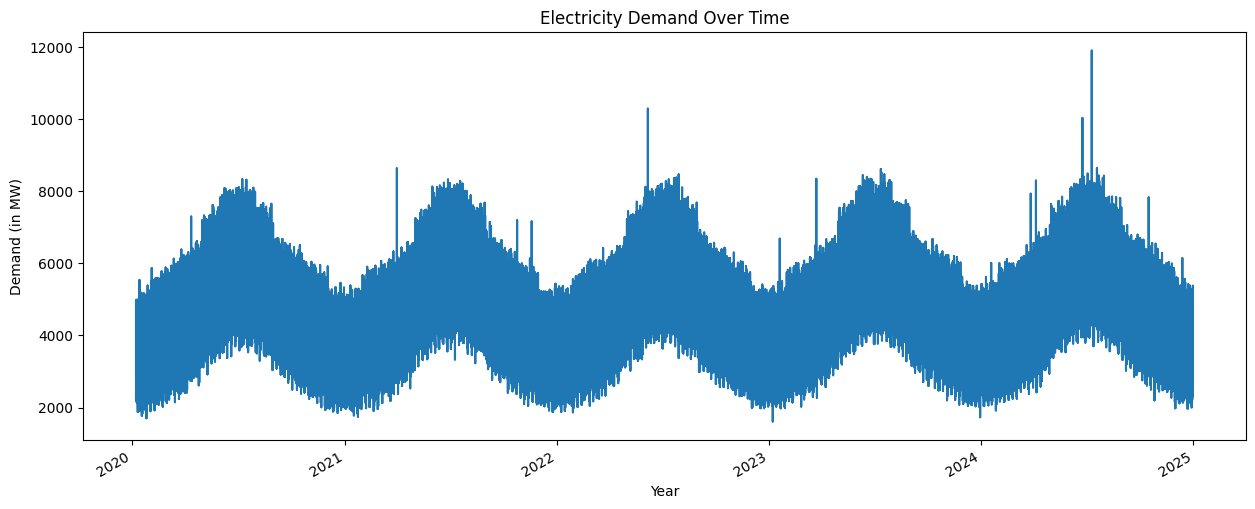

In [ ]:
data['Demand'].plot(figsize =(15,6), title = "Electricity Demand Over Time")
plt.xlabel("Year")                          # naming for x-axis
plt.ylabel("Demand (in MW)")                # naming for y-axis

plt.show()

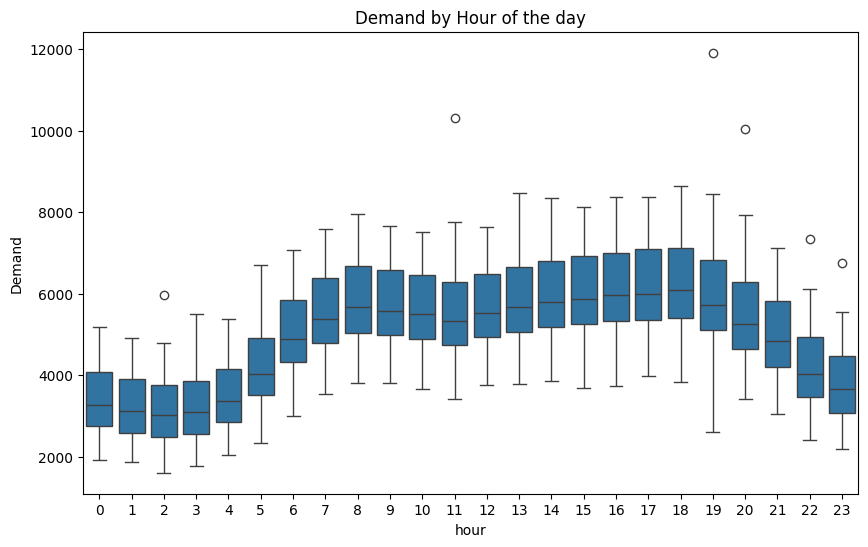

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(data = data, x = 'hour', y = 'Demand')
plt.title("Demand by Hour of the day");

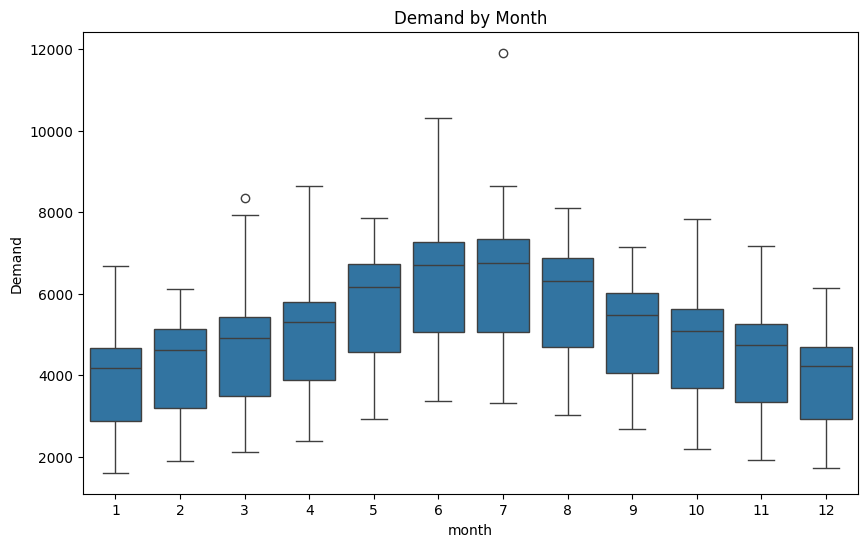

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data = data, x = 'month', y = 'Demand')
plt.title("Demand by Month")
plt.show()

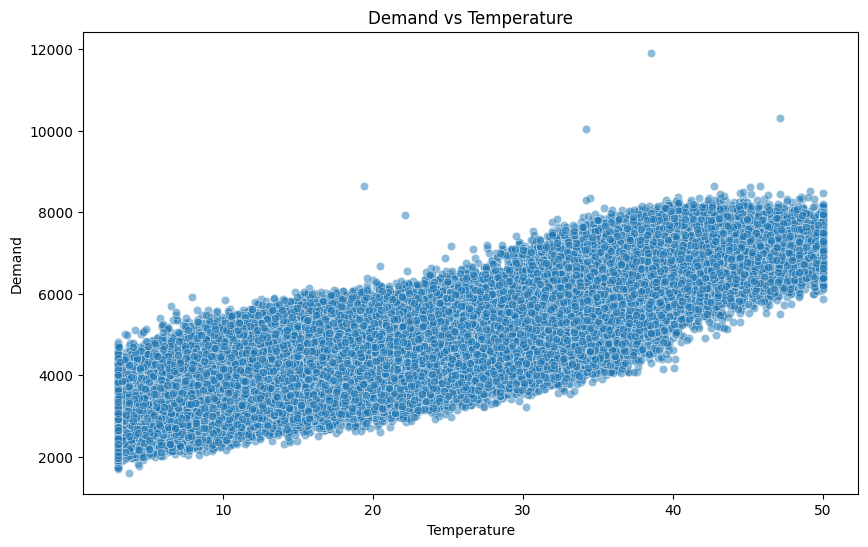

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = data, x = 'Temperature', y = 'Demand', alpha = 0.5)  #alpha - to adjust the tranparency of points
plt.title("Demand vs Temperature")
plt.show()

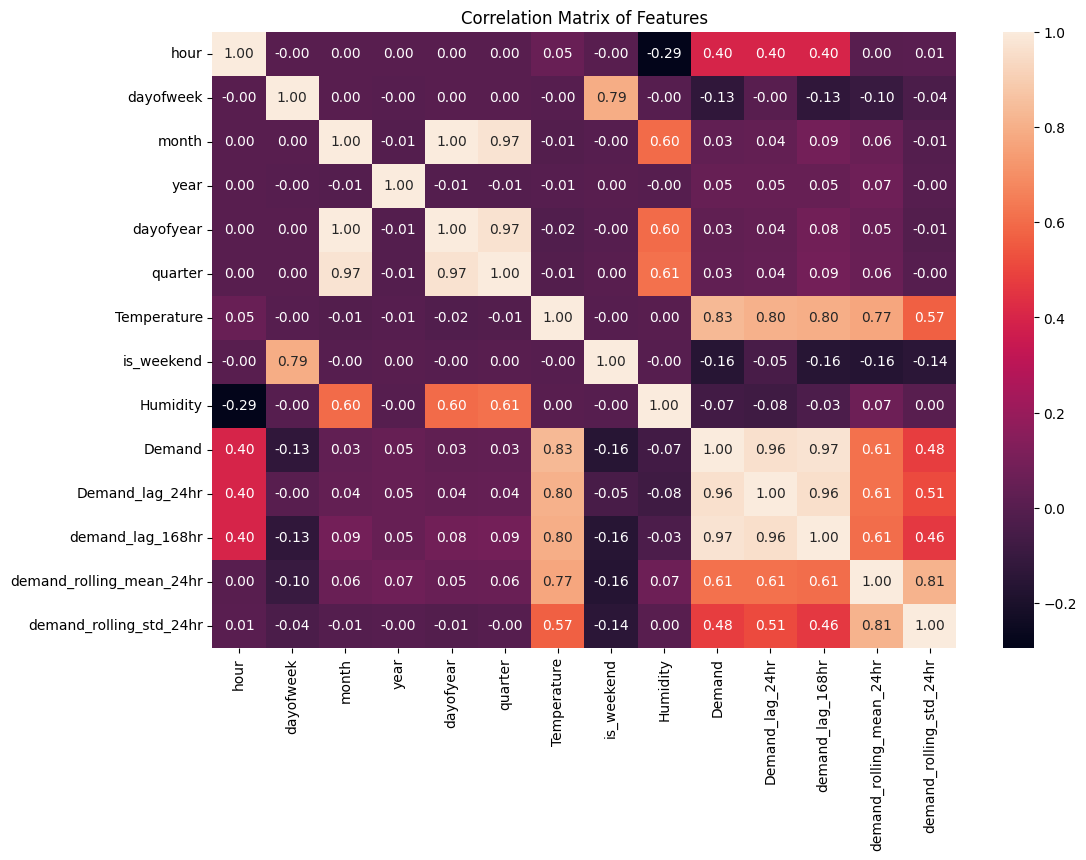

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot = True, fmt=".2f") # anoot=True : to show the numbers , fmt : to adjust decimals
plt.title("Correlation Matrix of Features")
plt.show()

In [ ]:
data

,hour,dayofweek,month,year,dayofyear,quarter,Temperature,is_weekend,Humidity,Demand,Demand_lag_24hr,demand_lag_168hr,demand_rolling_mean_24hr,demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,
2020-01-08,0,2,1,2020,8,1,3.000000,0,47.891592,2363.060115,2216.875986,2457.119872,3857.890516,1007.130968
2020-01-08,1,2,1,2020,8,1,4.433666,0,61.209727,2282.558766,2400.102433,2269.904712,3852.992863,1014.785101
2020-01-08,2,2,1,2020,8,1,5.000529,0,63.868618,2193.324174,2493.107375,2215.640403,3840.501897,1033.916351
2020-01-08,3,2,1,2020,8,1,4.253477,0,44.603210,2208.724679,2241.451559,2174.232413,3839.138277,1036.136212
2020-01-08,4,2,1,2020,8,1,5.966044,0,85.921008,2402.611018,2406.161001,2472.453006,3838.990361,1036.349905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,4,3.956838,0,43.287161,4689.693109,5102.077310,5105.730509,4039.969992,976.961312
2024-12-31,20,1,12,2024,366,4,3.118824,0,51.705756,4331.249224,4187.844204,4673.672173,4045.945201,978.342615
2024-12-31,21,1,12,2024,366,4,3.000000,0,40.565916,4015.979957,3859.260701,3856.359014,4052.475170,977.565114


In [ ]:
Y = data.Demand

In [ ]:
X = data.drop('Demand', axis=1)

In [ ]:
print(Y)

Timestamp
2020-01-08    2363.060115
2020-01-08    2282.558766
2020-01-08    2193.324174
2020-01-08    2208.724679
2020-01-08    2402.611018
                 ...     
2024-12-31    4689.693109
2024-12-31    4331.249224
2024-12-31    4015.979957
2024-12-31    3353.241682
2024-12-31    3219.023339
Name: Demand, Length: 43676, dtype: float64


In [ ]:
X

,hour,dayofweek,month,year,dayofyear,quarter,Temperature,is_weekend,Humidity,Demand_lag_24hr,demand_lag_168hr,demand_rolling_mean_24hr,demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,
2020-01-08,0,2,1,2020,8,1,3.000000,0,47.891592,2216.875986,2457.119872,3857.890516,1007.130968
2020-01-08,1,2,1,2020,8,1,4.433666,0,61.209727,2400.102433,2269.904712,3852.992863,1014.785101
2020-01-08,2,2,1,2020,8,1,5.000529,0,63.868618,2493.107375,2215.640403,3840.501897,1033.916351
2020-01-08,3,2,1,2020,8,1,4.253477,0,44.603210,2241.451559,2174.232413,3839.138277,1036.136212
2020-01-08,4,2,1,2020,8,1,5.966044,0,85.921008,2406.161001,2472.453006,3838.990361,1036.349905
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,4,3.956838,0,43.287161,5102.077310,5105.730509,4039.969992,976.961312
2024-12-31,20,1,12,2024,366,4,3.118824,0,51.705756,4187.844204,4673.672173,4045.945201,978.342615
2024-12-31,21,1,12,2024,366,4,3.000000,0,40.565916,3859.260701,3856.359014,4052.475170,977.565114


In [ ]:
X_train = X.loc[ : '2023-12-31']

In [ ]:
X_train

,hour,dayofweek,month,year,dayofyear,quarter,Temperature,is_weekend,Humidity,Demand_lag_24hr,demand_lag_168hr,demand_rolling_mean_24hr,demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,
2020-01-08,0,2,1,2020,8,1,3.000000,0,47.891592,2216.875986,2457.119872,3857.890516,1007.130968
2020-01-08,1,2,1,2020,8,1,4.433666,0,61.209727,2400.102433,2269.904712,3852.992863,1014.785101
2020-01-08,2,2,1,2020,8,1,5.000529,0,63.868618,2493.107375,2215.640403,3840.501897,1033.916351
2020-01-08,3,2,1,2020,8,1,4.253477,0,44.603210,2241.451559,2174.232413,3839.138277,1036.136212
2020-01-08,4,2,1,2020,8,1,5.966044,0,85.921008,2406.161001,2472.453006,3838.990361,1036.349905
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,19,6,12,2023,365,4,6.721774,1,46.627264,3894.908251,3840.654680,3597.790591,879.089476
2023-12-31,20,6,12,2023,365,4,7.557696,1,58.505012,3797.287793,4122.218903,3599.126925,879.430235
2023-12-31,21,6,12,2023,365,4,3.000000,1,48.001079,3280.602315,3307.887152,3604.785551,877.726873


In [ ]:
Y_train = Y.loc[ : '2023-12-31' ]

In [ ]:
Y_train

,Demand
Timestamp,
2020-01-08,2363.060115
2020-01-08,2282.558766
2020-01-08,2193.324174
2020-01-08,2208.724679
2020-01-08,2402.611018
...,...
2023-12-31,4185.721624
2023-12-31,3829.359810
2023-12-31,3416.409325


In [ ]:
X_test = X.loc[ '2024-01-01' : ]

In [ ]:
X_test

,hour,dayofweek,month,year,dayofyear,quarter,Temperature,is_weekend,Humidity,Demand_lag_24hr,demand_lag_168hr,demand_rolling_mean_24hr,demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,
2024-01-01,0,0,1,2024,1,1,3.000000,0,65.297046,2373.967493,2752.003113,3626.185642,856.204515
2024-01-01,1,0,1,2024,1,1,3.000000,0,69.068654,2328.972904,2419.747602,3640.380403,836.357296
2024-01-01,2,0,1,2024,1,1,3.000000,0,80.885372,1729.176090,2292.834087,3669.813854,776.458065
2024-01-01,3,0,1,2024,1,1,7.788675,0,66.501527,2257.337352,2507.704476,3685.801618,749.595470
2024-01-01,4,0,1,2024,1,1,6.607828,0,57.858109,2516.948873,2690.933257,3692.926651,738.736316
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,4,3.956838,0,43.287161,5102.077310,5105.730509,4039.969992,976.961312
2024-12-31,20,1,12,2024,366,4,3.118824,0,51.705756,4187.844204,4673.672173,4045.945201,978.342615
2024-12-31,21,1,12,2024,366,4,3.000000,0,40.565916,3859.260701,3856.359014,4052.475170,977.565114


In [ ]:
Y_test = Y.loc[ '2024-01-01' : ]

In [ ]:
Y_test

,Demand
Timestamp,
2024-01-01,2720.606072
2024-01-01,2669.647167
2024-01-01,2435.578924
2024-01-01,2641.043699
2024-01-01,2687.949643
...,...
2024-12-31,4689.693109
2024-12-31,4331.249224
2024-12-31,4015.979957


In [ ]:
print(X_train.shape)
print(Y_train.shape)

(34892, 13)
(34892,)


In [ ]:
print(X_test.shape)
print(Y_test.shape)

(8784, 13)
(8784,)


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
model_xgb = XGBRegressor(n_estimators = 1000,
                         early_stopping_rounds = 50,
                         learning_rate = 0.01,
                         random_state = 42,
                         objective = 'reg:squarederror' )

In [ ]:
model_xgb.fit(X_train, Y_train, eval_set = [(X_train, Y_train), (X_test, Y_test)], verbose = False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
predictions_xgb = model_xgb.predict(X_test)

In [ ]:
rmse_xgb = np.sqrt(mean_squared_error(Y_test, predictions_xgb))

mae_xgb = mean_absolute_error(Y_test, predictions_xgb )

In [ ]:
print('XGBoost RMSE:',  rmse_xgb)
print('XGBoost MAE:' ,  mae_xgb)

XGBoost RMSE: 175.13027180380183
XGBoost MAE: 123.41687826876458


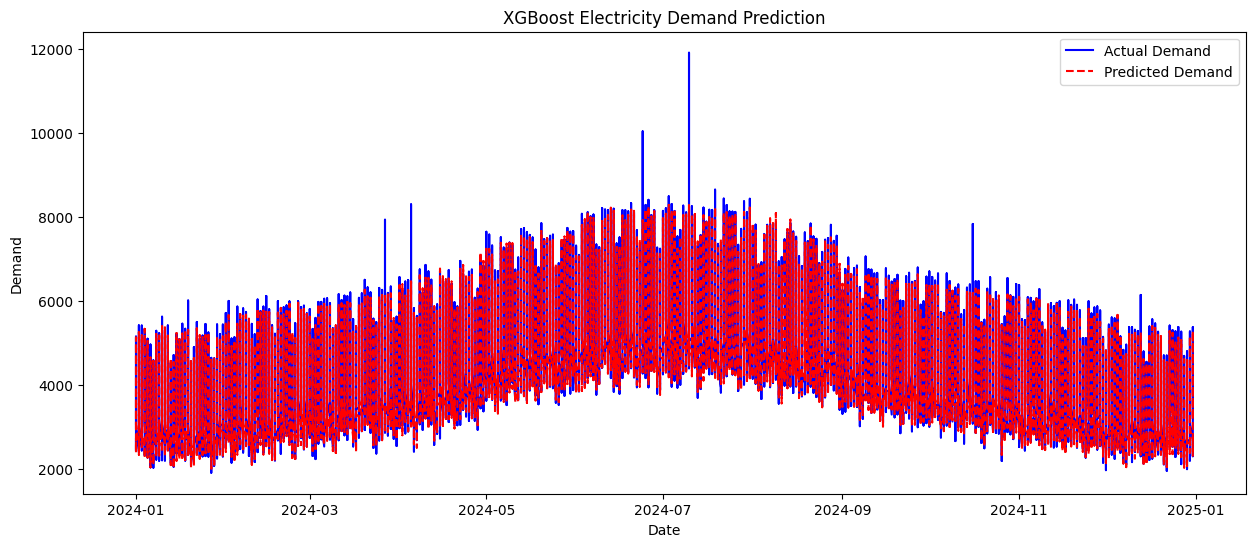

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(Y_test.index, Y_test, label = 'Actual Demand', color = 'Blue')
plt.plot(Y_test.index, predictions_xgb, label = 'Predicted Demand', color = 'Red', linestyle='--')
plt.title('XGBoost Electricity Demand Prediction')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()

plt.show()

In [ ]:
import joblib
model_xgb.save_model("electricity.json")  # or .ubj


import xgboost as xgb
model = xgb.Booster()
model.load_model("electricity.json")


In [ ]:
data.columns

Index(['hour', 'dayofweek', 'month', 'year', 'dayofyear', 'quarter',
       'Temperature', 'is_weekend', 'Humidity', 'Demand', 'Demand_lag_24hr',
       'demand_lag_168hr', 'demand_rolling_mean_24hr',
       'demand_rolling_std_24hr'],
      dtype='object')